# Classification of Recovering Patient Effected by VAE (Vaccine Adverse Event) Using XGboost

## 1. Farhan Radhi Zuhri (09011282126070)
## 2. Adam Yudhistira (09011282126060)

Pada Tahun 2021 covid 19 merupakan masalah serius yang dihadapi seluruh dunia. para tenaga kesehatan berusaha untuk membuat vaccine yang dapat menyembuhkan pasien covid tersebut. VAE (Vaccine Adverse Event) merupakan efek samping dari penggunaan vaccine tersebut. gejala ini dapat menyebabkan penyakit yang cukup serius. oleh karena itu dibutuhkannya prediksi apakah pasien yang terdampak VAE dapat sembuh lebih banyak yang sebagai acuan dalam penggunaan vaccine tersebut agar tidak terjadi masalah yang lebih lanjut.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# 1. Dataset

dataset yang digunakan memiliki 3 jenis yaitu VAERSDATA, VAERSVAX dan VAERSSYMPTOM
1. VAERSDATA mencakup beberapa informasi umum dari pasien yang terdampak VAE
2. VAERVAX mencakup informasi vaccine yang digunakan seperti jenis vaccine, dosis vaccine, tipe vaccine
3. VAERSSYMPTOM mencakup informasi gejala yang dialami pasien

In [2]:
patient = pd.read_csv("2021VAERSDATA.csv", encoding = 'unicode_escape', engine ='python')
patient.head().T #membuka data vaers

,0,1,2,3,4
VAERS_ID,916600,916601,916602,916603,916604
RECVDATE,01/01/2021,01/01/2021,01/01/2021,01/01/2021,01/01/2021
STATE,TX,CA,WA,WA,TX
AGE_YRS,33.0,73.0,23.0,58.0,47.0
CAGE_YR,33.0,73.0,23.0,58.0,47.0
CAGE_MO,NaN,NaN,NaN,NaN,NaN
SEX,F,F,F,F,F
RPT_DATE,NaN,NaN,NaN,NaN,NaN
SYMPTOM_TEXT,Right side of epiglottis swelled up and hinder...,Approximately 30 min post vaccination administ...,"About 15 minutes after receiving the vaccine, ...","extreme fatigue, dizziness,. could not lift my...","Injection site swelling, redness, warm to the ..."
DIED,NaN,NaN,NaN,NaN,NaN


In [42]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

Terdapat 35 fitur dan 34120 baris yang dimiliki data

In [3]:
vax=pd.read_csv("2021VAERSVAX.csv")
vax.head().T

,0,1,2,3,4
VAERS_ID,916600,916601,916602,916603,916604
VAX_TYPE,COVID19,COVID19,COVID19,COVID19,COVID19
VAX_MANU,MODERNA,MODERNA,PFIZER\BIONTECH,MODERNA,MODERNA
VAX_LOT,037K20A,025L20A,EL1284,unknown,NaN
VAX_DOSE_SERIES,1,1,1,UNK,1
VAX_ROUTE,IM,IM,IM,NaN,IM
VAX_SITE,LA,RA,LA,NaN,LA
VAX_NAME,COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (PFIZER-BIONTECH)),COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (MODERNA))


In [4]:
gejala=pd.read_csv("2021VAERSSYMPTOMS.csv")
gejala.head().T #membuka data vaerssymtoms

,0,1,2,3,4
VAERS_ID,916600,916601,916602,916603,916604
SYMPTOM1,Dysphagia,Anxiety,Chest discomfort,Dizziness,Injection site erythema
SYMPTOMVERSION1,23.1,23.1,23.1,23.1,23.1
SYMPTOM2,Epiglottitis,Dyspnoea,Dysphagia,Fatigue,Injection site pruritus
SYMPTOMVERSION2,23.1,23.1,23.1,23.1,23.1
SYMPTOM3,NaN,NaN,Pain in extremity,Mobility decreased,Injection site swelling
SYMPTOMVERSION3,NaN,NaN,23.1,23.1,23.1
SYMPTOM4,NaN,NaN,Visual impairment,NaN,Injection site warmth
SYMPTOMVERSION4,NaN,NaN,23.1,NaN,23.1
SYMPTOM5,NaN,NaN,NaN,NaN,NaN


## 2. Data Preprocessing

## Menggabungkan 3 dataset

In [5]:
df1 = pd.merge(vax, patient, left_on='VAERS_ID', right_on='VAERS_ID') #menggabungkan 3 dataset menjadi 1
df2 = pd.merge(df1, gejala, left_on='VAERS_ID', right_on='VAERS_ID')
print(df2.shape) 
df2[0:3].T

(49021, 52)


,0,1,2
VAERS_ID,916600,916601,916602
VAX_TYPE,COVID19,COVID19,COVID19
VAX_MANU,MODERNA,MODERNA,PFIZER\BIONTECH
VAX_LOT,037K20A,025L20A,EL1284
VAX_DOSE_SERIES,1,1,1
VAX_ROUTE,IM,IM,IM
VAX_SITE,LA,RA,LA
VAX_NAME,COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (PFIZER-BIONTECH))
RECVDATE,01/01/2021,01/01/2021,01/01/2021
STATE,TX,CA,WA


In [6]:
df3=df2.loc[    df2['VAX_TYPE']=='COVID19']
df3.head(3).T #melihat vaccine tipe yang digunakan

,0,1,2
VAERS_ID,916600,916601,916602
VAX_TYPE,COVID19,COVID19,COVID19
VAX_MANU,MODERNA,MODERNA,PFIZER\BIONTECH
VAX_LOT,037K20A,025L20A,EL1284
VAX_DOSE_SERIES,1,1,1
VAX_ROUTE,IM,IM,IM
VAX_SITE,LA,RA,LA
VAX_NAME,COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (MODERNA)),COVID19 (COVID19 (PFIZER-BIONTECH))
RECVDATE,01/01/2021,01/01/2021,01/01/2021
STATE,TX,CA,WA


In [7]:
df3['VAX_TYPE'].value_counts() #menghitung vaccine tipe covid19 

COVID19    48338
Name: VAX_TYPE, dtype: int64

In [8]:
df4=df3[  ['VAERS_ID','AGE_YRS', 'SEX','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5','VAX_MANU','RECOVD']  ] 
df4.head(8).T

,0,1,2,3,4,5,6,7
VAERS_ID,916600,916601,916602,916603,916604,916606,916607,916608
AGE_YRS,33.0,73.0,23.0,58.0,47.0,44.0,50.0,33.0
SEX,F,F,F,F,F,F,M,M
SYMPTOM1,Dysphagia,Anxiety,Chest discomfort,Dizziness,Injection site erythema,Pharyngeal swelling,Abdominal pain,Diarrhoea
SYMPTOM2,Epiglottitis,Dyspnoea,Dysphagia,Fatigue,Injection site pruritus,NaN,Chills,Nasal congestion
SYMPTOM3,NaN,NaN,Pain in extremity,Mobility decreased,Injection site swelling,NaN,Sleep disorder,NaN
SYMPTOM4,NaN,NaN,Visual impairment,NaN,Injection site warmth,NaN,NaN,NaN
SYMPTOM5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAX_MANU,MODERNA,MODERNA,PFIZER\BIONTECH,MODERNA,MODERNA,MODERNA,MODERNA,MODERNA
RECOVD,Y,Y,U,Y,N,Y,Y,NaN


In [9]:
df4['RECOVD'].value_counts() #menghitung jumlah pasien yang telah sembuh


N    19924
Y    16568
U     8324
Name: RECOVD, dtype: int64

1. N menandakan "No" atau kondisi pasien tidak sembuh dari gejala tersebut.
2. U menandakan "Unknown" atau kondisi pasien tidak diketahui apakah sembuh dari gejala tersebut atau tidak.
3. Y menandakan "Yes" atau kondisi pasien sembuh dari gejala tersebut.

In [10]:
df4["RECOVD"].replace ('U', np.nan, inplace=True)
df4.dropna(subset=["RECOVD"], axis=0, inplace=True)
df4.reset_index(drop=True, inplace=True)

C:\anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


untuk melakukan prediksi label N harus dihilangkan dengan menggantikannya sebagai nan lalu di drop dari dataset

In [11]:
df4['SYMPTOM1'].value_counts()[:50]
df4_s1=pd.DataFrame(df4['SYMPTOM1'].value_counts()[:50])
df4_s1 #melihat gejala pada symptom

,SYMPTOM1
Chills,2638
Arthralgia,1615
Headache,1142
Fatigue,1126
Injection site erythema,1090
Dizziness,1086
Asthenia,875
Pyrexia,861
Death,752
Erythema,607


In [12]:
df4_s1['AC']=df4_s1['SYMPTOM1']
for k in range (1,50):
    df4_s1['AC'][k]=(   (df4_s1['AC'][k-1]) +  (df4_s1['SYMPTOM1'][k])  )
df4_s1.head()
#untuk mengetahui jumlah gejala pada symptom


,SYMPTOM1,AC
Chills,2638,2638
Arthralgia,1615,4253
Headache,1142,5395
Fatigue,1126,6521
Injection site erythema,1090,7611


In [13]:
total=np.sum(df4_s1['SYMPTOM1']) # mengubahnya dalam bentuk persen
df4_s1['%']= df4_s1['AC']/total*100
df4_s1.head(50)


,SYMPTOM1,AC,%
Chills,2638,2638,12.110917
Arthralgia,1615,4253,19.525296
Headache,1142,5395,24.768157
Fatigue,1126,6521,29.937563
Injection site erythema,1090,7611,34.941695
Dizziness,1086,8697,39.927463
Asthenia,875,9572,43.944541
Pyrexia,861,10433,47.897346
Death,752,11185,51.349738
Erythema,607,11792,54.136443


<AxesSubplot:>

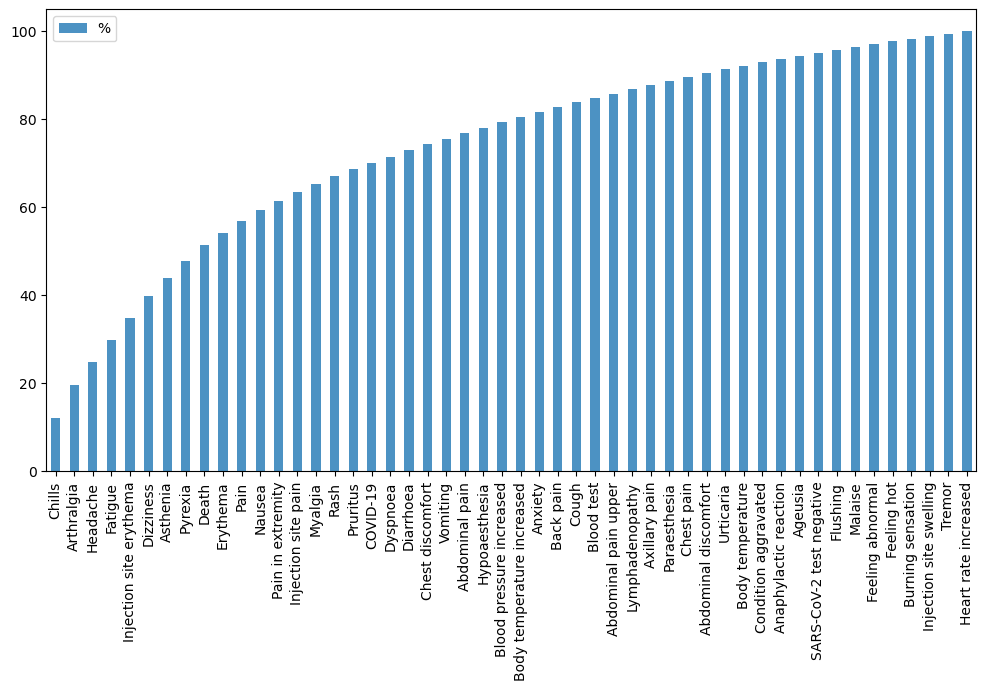

In [14]:
df4_s1.plot.bar(y=['%'], alpha=0.8, figsize=(12,6)) #visualisasi gejala yang dialami pasien


# 2.3 Encoding Data

tujuan untuk mengubah data agar lebih mudah diprediksi

In [16]:
df5=df4

In [17]:
#menggambil 10 jenis gejala dan gejala lainnya akan dilabeli others
def Purge (list,column):
    k=0
    while (k<len(df5)):
        for i in list:
            if  df5[column][k] not in list1:
                df5[column][k]='Others' 
        k=k+1
    return () 

In [18]:
#membuat list data
#list1
list1=df5['SYMPTOM1'].value_counts()[:10]
list1=list1.index
#column1
column1='SYMPTOM1'

#list2
list2=df5['SYMPTOM2'].value_counts()[:10]
list2=list2.index
#column2
column2='SYMPTOM2'

#list3
list3=df5['SYMPTOM3'].value_counts()[:10]
list3=list3.index
#column3
column3='SYMPTOM3'

#list4
list4=df5['SYMPTOM4'].value_counts()[:10]
list4=list4.index
#column4
column4='SYMPTOM4'

#list5
list5=df5['SYMPTOM5'].value_counts()[:10]
list5=list5.index
#column5
column5='SYMPTOM5'

In [19]:
#mengubah label data symptom
Purge(list1,column1)
print('SYMPTOM1 - done')
Purge(list2,column2)
print('SYMPTOM2 - done')
Purge(list3,column3)
print('SYMPTOM3 - done')
Purge(list4,column4)
print('SYMPTOM4 - done')
Purge(list5,column5)
print('SYMPTOM5 - done')

C:\Users\FARHAN RADHI\AppData\Local\Temp\ipykernel_52952\1189899015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5[column][k]='Others'


SYMPTOM1 - done
SYMPTOM2 - done
SYMPTOM3 - done
SYMPTOM4 - done
SYMPTOM5 - done


In [20]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
columns=['SEX','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5','VAX_MANU','RECOVD'] 
for i in columns:
    df4[i] = en.fit_transform(df4[i])    
df4.head()  


C:\Users\FARHAN RADHI\AppData\Local\Temp\ipykernel_52952\972671134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[i] = en.fit_transform(df4[i])
C:\Users\FARHAN RADHI\AppData\Local\Temp\ipykernel_52952\972671134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[i] = en.fit_transform(df4[i])
C:\Users\FARHAN RADHI\AppData\Local\Temp\ipykernel_52952\972671134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,VAERS_ID,AGE_YRS,SEX,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MANU,RECOVD
0,916600,33.0,0,9,9,9,9,9,1,1
1,916601,73.0,0,9,9,9,9,9,1,1
2,916603,58.0,0,4,6,9,9,9,1,1
3,916604,47.0,0,8,9,9,9,9,1,0
4,916606,44.0,0,9,9,9,9,9,1,1


angka 9 mepresentasikan others

## 3. Prediksi Model

In [21]:
y = df5['RECOVD']
x = df5.drop('RECOVD',axis=1)

y adalah label yang akan digunakan dan x merupakan fitur yang akan diuji

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


In [23]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [24]:
xg_cl.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
preds = xg_cl.predict(x_test)
preds=preds.reshape(7299,1)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
# validasi akurasi
accuracy = accuracy_score(y_test, preds)

#membuat laporan dari hasil y_pred_class
classificationReport = classification_report(y_test, preds, zero_division=0, output_dict=True)

#
scores_reg = cross_val_score(xg_cl, x, y, cv=10)

# mengubah laporan menjadi bentuk data frame
report = pd.DataFrame(classificationReport).transpose()

report

,precision,recall,f1-score,support
0,0.653140,0.721513,0.685626,3993.000000
1,0.614958,0.537205,0.573458,3306.000000
accuracy,0.638033,0.638033,0.638033,0.638033
macro avg,0.634049,0.629359,0.629542,7299.000000
weighted avg,0.635846,0.638033,0.634821,7299.000000


terlihat accuracy yang didapatkan adalah 63,8% menunjukan model cukup baik memprediksi dan 